In [258]:
# librerías
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from numpy import meshgrid
from scipy.interpolate import griddata as gd
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
%matplotlib inline

In [259]:
# constantes
LONG_MIN = -115.65
LONG_MAX = -107.94
LAT_MIN = 25.41
LAT_MAX = 33.06

In [260]:
nombreArchivo = "GBBEPx.emis_pm25.001.20180117.nc"
arrayNombreArchivo = nombreArchivo.split(".")
arrayComponente = arrayNombreArchivo[1].split("_")
nombreParaMapa = arrayComponente[1]
rutaArchivo = "../data/{}".format(nombreArchivo)

In [261]:
dataset = Dataset(rutaArchivo)

In [262]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    PRODUCT_ALGORITHM_VERSION: 1.0
    TIME_RANGE: day
    RangeBeginningDate(YYYY-DOY): 2018-17
    RangeBeginningTime(UTC-hour): 0
    RangeEndingDate(YYYY-DOY): 2018-17
    RangeEndingTime(UTC-hour): 23
    WestBoundingCoordinate(degree): -180.0
    EastBoundingCoordinate(degree): 180.0
    NorthBoundingCoordinate(degree): 90.0
    SouthBoundingCoordinate(degree): -90.0
    dimensions(sizes): Time(1), Latitude(721), Longitude(1152)
    variables(dimensions): float32 Time(Time), float32 Latitude(Latitude), float32 Longitude(Longitude), float64 biomass(Time,Latitude,Longitude)
    groups: 

In [263]:
dataset.variables

OrderedDict([('Time', <class 'netCDF4._netCDF4.Variable'>
              float32 Time(Time)
                  units: days since 2018-01-17 12:00:00
                  time_increment: 240000
                  begin_date: 20180117
                  begin_time: 120000
              unlimited dimensions: 
              current shape = (1,)
              filling off), ('Latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 Latitude(Latitude)
                  long_name: Latitude
                  units: degrees_north
                  valid_range: [-90.  90.]
                  scale_factor: 1.0
                  add_offset: 0.0
                  _FillValue: -9999.0
              unlimited dimensions: 
              current shape = (721,)
              filling off), ('Longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 Longitude(Longitude)
                  long_name: Longitude
                  units: degree_east
                  valid_range: [-180.  180.]
  

In [264]:
dataset.variables['biomass'].shape

(1, 721, 1152)

In [265]:

biomass = np.array(dataset.variables['biomass'])

In [266]:
biomass

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [267]:
biomass.shape

(1, 721, 1152)

In [268]:
biomass[0][1]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [269]:
biomass = dataset.variables['biomass'][:]
Latitude = dataset.variables['Latitude'][:]
Longitude = dataset.variables['Longitude'][:]

In [270]:
biomass.shape


(1, 721, 1152)

In [271]:
Latitude.shape

(721,)

In [272]:
Longitude.shape

(1152,)

In [273]:
dataText = "Long,Lat,Biomass\n"

In [274]:
for i in range(Longitude.shape[0]):
    for j in range(Latitude.shape[0]):
        tempText = "{},{},{}\n".format(Longitude[i], Latitude[j], biomass[0,j,i])
        dataText += tempText

In [275]:
fileName = '../temp/2018-01-17.csv'
textFile = open(fileName, "w")
textFile.write(dataText)
textFile.close()

In [276]:
data = pd.read_csv(fileName)

In [277]:
data.describe()

,Long,Lat,Biomass
count,830592.000000,830592.000000,8.305920e+05
mean,-0.156250,0.000000,3.151680e-12
std,103.923072,52.033674,5.160880e-10
min,-180.000000,-90.000000,0.000000e+00
25%,-90.078125,-45.000000,0.000000e+00
50%,-0.156250,0.000000,0.000000e+00
75%,89.765625,45.000000,0.000000e+00
max,179.687500,90.000000,4.299577e-07


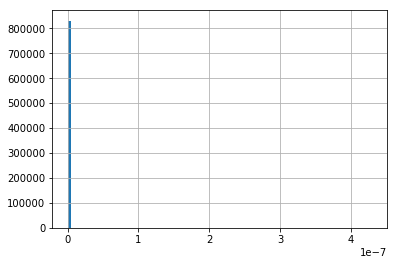

In [278]:

data.Biomass.hist(bins=100)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830592 entries, 0 to 830591
Data columns (total 3 columns):
Long       830592 non-null float64
Lat        830592 non-null float64
Biomass    830592 non-null float64
dtypes: float64(3)
memory usage: 19.0 MB


In [280]:
# límites
# limites longitud > -115.65 y < -107.94
data = data.loc[data['Long'] > LONG_MIN]
data = data.loc[data['Long'] < LONG_MAX]

In [281]:
# limites latitud > 25.41 y < 33.06
data = data.loc[data['Lat'] > LAT_MIN]
data = data.loc[data['Lat'] < LAT_MAX]

In [282]:
# obtener valores de x, y
lons = np.array(data['Long'])
lats = np.array(data['Lat'])

#%% iniciar la gráfica
plt.clf()

In [283]:
m = Basemap(projection='mill',llcrnrlat=LAT_MIN,urcrnrlat=LAT_MAX,llcrnrlon=LONG_MIN,urcrnrlon=LONG_MAX,resolution='h')

In [284]:
# generar lats, lons
x, y = m(lons, lats)

# numero de columnas y filas
numCols = len(x)
numRows = len(y)

****** Genereate: /Users/jorgemauricio/Documents/Research/proyectoCaborca/maps/pm25_2018-01-17.png


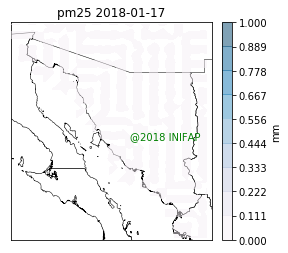

In [285]:
# generar xi, yi
xi = np.linspace(x.min(), x.max(), numCols)
yi = np.linspace(y.min(), y.max(), numRows)

# generar el meshgrid
xi, yi = np.meshgrid(xi, yi)

# generar zi
z = np.array(data['Biomass'])
zi = gd((x,y), z, (xi,yi), method='cubic')

# generar clevs
stepVariable = 1
step = (z.max() - z.min()) / 10

# verificar el valor del intervalo
if step <= 1:
    stepVariable = 1

clevs = np.linspace(z.min(), z.max() + stepVariable , 10)
#clevs = [1,2,3,4,5,6,7,8,9,10]

#%% contour plot
cs = m.contourf(xi,yi,zi, clevs, zorder=5, alpha=0.5, cmap='PuBu')
m.readshapefile('../shapes/Estados', 'Estados')

#%% colorbar
cbar = m.colorbar(cs, location='right', pad="5%")
cbar.set_label('mm')
tituloTemporalParaElMapa = "{} {}".format(nombreParaMapa, "2018-01-17")
plt.title(tituloTemporalParaElMapa)

# Mac /Users/jorgemauricio/Documents/Research/proyectoGranizo/Maps/{}_{}.png
# Linux /home/jorge/Documents/Research/proyectoGranizo/Maps/{}_{}.png
nombreTemporalParaElMapa = "/Users/jorgemauricio/Documents/Research/proyectoCaborca/maps/{}_2018-01-17.png".format(nombreParaMapa)
plt.annotate('@2018 INIFAP', xy=(-109,29), xycoords='figure fraction', xytext=(0.45,0.45), color='g', zorder=50)

plt.savefig(nombreTemporalParaElMapa, dpi=300)
print('****** Genereate: {}'.format(nombreTemporalParaElMapa))